In [46]:
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import date

# The plot module for graphs
import matplotlib.pyplot as plt
%matplotlib inline

# The statistical module for statistical analysis
import scipy.stats as stats
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [47]:
# File to Load (Remember to Change These)
weather_data_to_load = "clean_weather_1-1-2016_to_8-31-2020.csv"
crime_data_to_load = "crime_cleaned.csv"

# Read School and Student Data File and store into Pandas DataFrames
weather_data = pd.read_csv(weather_data_to_load,usecols=["Date","Avg temperature (F)","Precip Inches","Cloud Cover","Wind Speed(Miles)"])
crime_data = pd.read_csv(crime_data_to_load,usecols = ['Occurrence_date','OFFENSE_TYPE_ID','OFFENSE_CATEGORY_ID','INCIDENT_ID'])
crime_data_for_pivot = pd.read_csv(crime_data_to_load,usecols = ['Occurrence_date','OFFENSE_TYPE_ID','INCIDENT_ID'])


In [48]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
print(len(weather_data))

1705


In [49]:
crime_data['Occurrence_date'] = pd.to_datetime(crime_data['Occurrence_date'])
crime_data
# crime_data_type_only = crime_data.groupby(['crime_date', 'OFFENSE_CATEGORY_ID']).nunique()

# crime_data_type_only.drop(['Occurrence_date','crime_date', 'OFFENSE_CATEGORY_ID','OFFENSE_TYPE_ID'], axis=1, inplace=True)
# crime_data_type_only= crime_data_type_only.reset_index()
# crime_data_type_only

,Occurrence_date,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ID
0,2016-01-01,aggravated-assault,aggravated-assault,10
1,2016-01-01,aggravated-assault-dv,aggravated-assault,2
2,2016-01-01,assault-dv,other-crimes-against-persons,7
3,2016-01-01,assault-police-simple,other-crimes-against-persons,2
4,2016-01-01,assault-simple,other-crimes-against-persons,5
...,...,...,...,...
108606,2020-09-09,vehicular-eluding,all-other-crimes,1
108607,2020-09-09,vehicular-eluding-no-chase,all-other-crimes,4
108608,2020-09-09,weapon-by-prev-offender-powpo,all-other-crimes,1
108609,2020-09-09,weapon-poss-illegal-dangerous,all-other-crimes,1


In [50]:
crime_data_pivot = crime_data.pivot_table(index='Occurrence_date', columns = 'OFFENSE_CATEGORY_ID', values ='INCIDENT_ID',aggfunc="count")
crime_data_pivot = crime_data_pivot.fillna(0)
crime_data_pivot["total_offenses"] = crime_data_pivot.iloc[:,:].sum(axis=1)
# crime_data_pivot.info()
crime_data_pivot.head()

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,total_offenses
Occurrence_date,,,,,,,,,,,,,,,
2015-01-02,3.0,9.0,0.0,2.0,3.0,4.0,6.0,0.0,2.0,5.0,2.0,0.0,2.0,2.0,40.0
2015-01-03,3.0,10.0,0.0,1.0,3.0,5.0,5.0,0.0,2.0,7.0,1.0,1.0,2.0,1.0,41.0
2015-01-04,3.0,12.0,0.0,1.0,2.0,4.0,4.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,38.0
2015-01-05,4.0,17.0,0.0,1.0,4.0,11.0,5.0,0.0,2.0,5.0,1.0,2.0,2.0,4.0,58.0
2015-01-06,2.0,9.0,0.0,1.0,3.0,11.0,5.0,0.0,2.0,6.0,2.0,1.0,2.0,4.0,48.0


In [51]:
# Combine the data into a single dataset.  
#inner merge intentionally drops days that do not match in both data sets to avoid NaN records
criminal_weather_merged = pd.merge(crime_data_pivot, weather_data, left_on = 'Occurrence_date',right_on = 'Date')
criminal_weather_merged = criminal_weather_merged[['Date','total_offenses','Avg temperature (F)','Precip Inches',\
                                                             'Cloud Cover', 'Wind Speed(Miles)',]]
print(criminal_weather_merged['Date'].min())
print(criminal_weather_merged['Date'].max())
criminal_weather_merged


2016-01-01 00:00:00
2020-08-31 00:00:00


,Date,total_offenses,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles)
0,2016-01-01,55.0,11,0.0,2.000,3.375
1,2016-01-02,51.0,20,0.0,10.875,4.500
2,2016-01-03,44.0,24,0.0,10.750,3.500
3,2016-01-04,44.0,22,0.0,56.250,5.750
4,2016-01-05,50.0,28,0.0,19.750,3.250
...,...,...,...,...,...,...
1700,2020-08-27,51.0,85,0.0,34.750,5.750
1701,2020-08-28,48.0,72,0.1,48.250,6.875
1702,2020-08-29,48.0,75,0.0,26.875,4.875
1703,2020-08-30,39.0,81,0.0,18.000,7.125


In [52]:
summary_stats=criminal_weather_merged[["Avg temperature (F)","Precip Inches","Cloud Cover","Wind Speed(Miles)","total_offenses"]].describe()
summary_stats

,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles),total_offenses
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,51.965982,0.003754,23.846628,5.598387,50.468035
std,18.342881,0.021613,20.858988,1.817526,5.709852
min,-4.000000,0.000000,0.000000,1.375000,32.000000
25%,38.000000,0.000000,8.125000,4.375000,47.000000
50%,51.000000,0.000000,17.500000,5.375000,51.000000
75%,68.000000,0.000000,34.250000,6.375000,54.000000
max,92.000000,0.300000,100.000000,17.250000,72.000000


In [53]:
def linear(x_axis,y_axis,x_label,y_label,title,eq_position):

    plt.scatter(x_axis,y_axis,color="b",edgecolors="k",alpha=1)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    plt.title(title,fontsize=15)
    plt.tight_layout()
    correlation=st.pearsonr(x_axis,y_axis)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r")
    plt.annotate(line_eq,eq_position,fontsize=15,color='r')
    print(f"The r-value is: {rvalue}")
    print(f"The p-value is:{pvalue}")
    plt.show()
    return
    

The correlation between both factors is 0.2
The r-value is: 0.20334742938869838
The p-value is:2.2688204649193902e-17


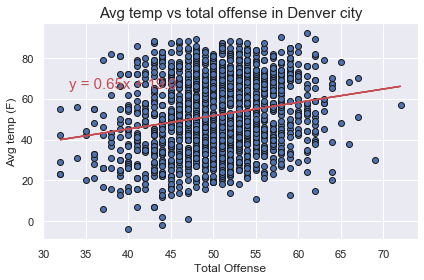

In [54]:
linear(criminal_weather_merged["total_offenses"],criminal_weather_merged["Avg temperature (F)"],"Total Offense","Avg temp (F)","Avg temp vs total offense in Denver city",(33,65))




The correlation between both factors is -0.09
The r-value is: -0.09175813277246593
The p-value is:0.00014819678212877165


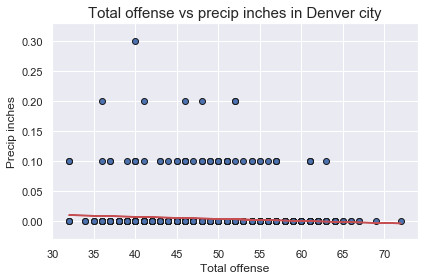

In [55]:
linear(criminal_weather_merged["total_offenses"],criminal_weather_merged["Precip Inches"],"Total offense","Precip inches","Total offense vs precip inches in Denver city",(25,.02))


The correlation between both factors is -0.01
The r-value is: -0.014830703714289729
The p-value is:0.5405584642776051


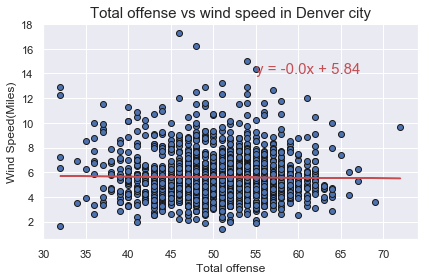

In [56]:
linear(criminal_weather_merged["total_offenses"],criminal_weather_merged["Wind Speed(Miles)"],"Total offense","Wind Speed(Miles)","Total offense vs wind speed in Denver city",(55,14))


<Figure size 720x720 with 0 Axes>

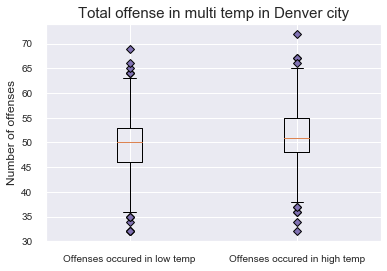

In [57]:
cold_weather=criminal_weather_merged[criminal_weather_merged["Avg temperature (F)"] <=50]

cold_weather

hot_weather=criminal_weather_merged[criminal_weather_merged["Avg temperature (F)"] >50].reset_index().drop(["index"],axis=1)
hot_weather

plt.figure(figsize=(10,10))
mov_diamond = dict(markerfacecolor='m', marker='D')

list_of_offense_temp=[cold_weather["total_offenses"],hot_weather["total_offenses"]]
labels=["Offenses occured in low temp","Offenses occured in high temp"]
fig, ax = plt.subplots()
plt.tick_params(labelsize=10, width=2, length=10,color="r")
plt.ylabel("Number of offenses")
plt.title("Total offense in multi temp in Denver city",fontsize=15)
plt.boxplot(list_of_offense_temp,labels=labels,flierprops=mov_diamond)
plt.show()

In [58]:
quartiles = cold_weather["total_offenses"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile for offenses occured in low temp is: {lowerq}")
print(f"The upper quartile for offenses occured in low temp is: {upperq}")
print(f"The the median for offenses occured in low temp is: {quartiles[0.5]}")

#Determine outliers using upper and lower bounds
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)   
print(f"The interquartile range for offenses occured in low temp is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartiles = hot_weather["total_offenses"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile for offenses occured in high temp is: {lowerq}")
print(f"The upper quartile for offenses occured in high temp is: {upperq}")
print(f"The the median for offenses occured in low high is: {quartiles[0.5]}")

#Determine outliers using upper and lower bounds
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)   
print(f"The interquartile range for offenses occured in high temp is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for offenses occured in low temp is: 46.0
The upper quartile for offenses occured in low temp is: 53.0
The the median for offenses occured in low temp is: 50.0
The interquartile range for offenses occured in low temp is: 7.0
Values below 35.5 could be outliers.
Values above 63.5 could be outliers.
The lower quartile for offenses occured in high temp is: 48.0
The upper quartile for offenses occured in high temp is: 55.0
The the median for offenses occured in low high is: 51.0
The interquartile range for offenses occured in high temp is: 7.0
Values below 37.5 could be outliers.
Values above 65.5 could be outliers.


In [59]:
criminal_weather_merged["Date"]=pd.to_datetime(criminal_weather_merged["Date"])
criminal_weather_merged.dtypes


Date                   datetime64[ns]
total_offenses                float64
Avg temperature (F)             int64
Precip Inches                 float64
Cloud Cover                   float64
Wind Speed(Miles)             float64
dtype: object

In [60]:
criminal_weather_merged=criminal_weather_merged.set_index("Date")
criminal_weather_merged.head()

criminal_weather_merged.index

criminal_weather_merged["Year"]=criminal_weather_merged.index.year
criminal_weather_merged["Month"]=criminal_weather_merged.index.month
criminal_weather_merged

,total_offenses,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles),Year,Month
Date,,,,,,,
2016-01-01,55.0,11,0.0,2.000,3.375,2016,1
2016-01-02,51.0,20,0.0,10.875,4.500,2016,1
2016-01-03,44.0,24,0.0,10.750,3.500,2016,1
2016-01-04,44.0,22,0.0,56.250,5.750,2016,1
2016-01-05,50.0,28,0.0,19.750,3.250,2016,1
...,...,...,...,...,...,...,...
2020-08-27,51.0,85,0.0,34.750,5.750,2020,8
2020-08-28,48.0,72,0.1,48.250,6.875,2020,8
2020-08-29,48.0,75,0.0,26.875,4.875,2020,8


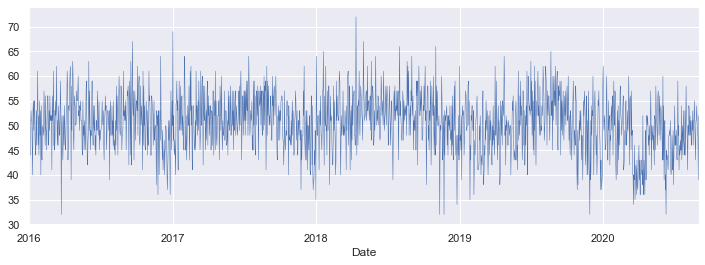

In [61]:
sns.set(rc={'figure.figsize':(12, 4)})
ax.set_title("Offenses occured from 2016-2020")
criminal_weather_merged["total_offenses"].plot(linewidth=0.5)




Text(0.5, 1.0, 'Offenses occured in 2016')

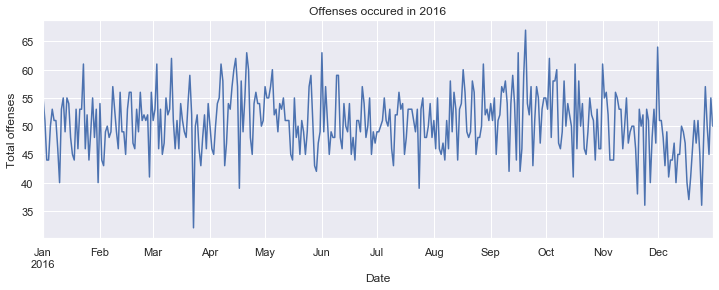

In [62]:
ax = criminal_weather_merged.loc["2016", "total_offenses"].plot()
ax.set_ylabel("Total offenses")
ax.set_title("Offenses occured in 2016")


Text(0.5, 1.0, 'Offenses occured in 2017')

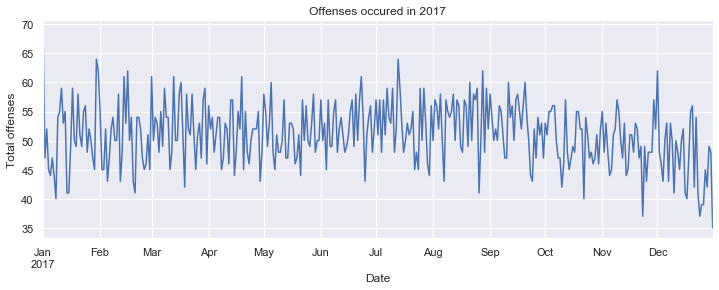

In [63]:
ax = criminal_weather_merged.loc["2017", "total_offenses"].plot()
ax.set_ylabel("Total offenses")
ax.set_title("Offenses occured in 2017")


Text(0.5, 1.0, 'Offenses occured in 2018')

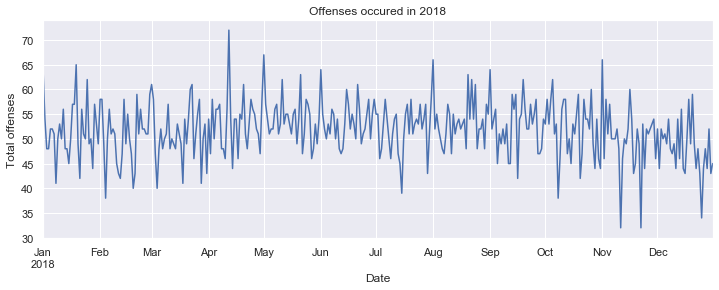

In [64]:
ax = criminal_weather_merged.loc["2018", "total_offenses"].plot()
ax.set_ylabel("Total offenses")
ax.set_title("Offenses occured in 2018")



Text(0.5, 1.0, 'Offenses occured in 2019')

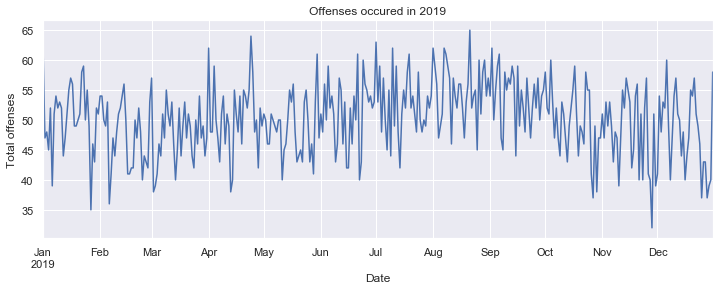

In [65]:
ax = criminal_weather_merged.loc["2019", "total_offenses"].plot()
ax.set_ylabel("Total offenses")
ax.set_title("Offenses occured in 2019")


Text(0.5, 1.0, 'Offenses occured in 2020')

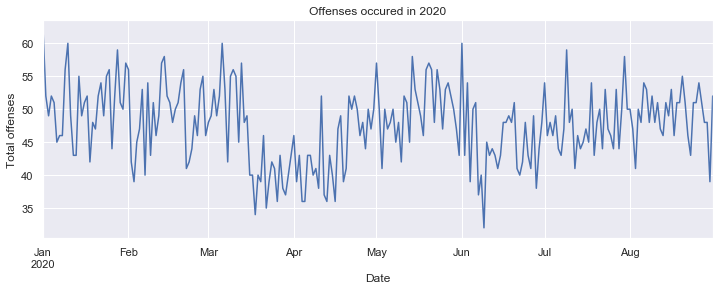

In [66]:
ax = criminal_weather_merged.loc["2020", "total_offenses"].plot()
ax.set_ylabel("Total offenses")
ax.set_title("Offenses occured in 2020")

In [67]:
weather_data["Date"]=pd.to_datetime(weather_data["Date"])
crime_data["Occurrence_date"]=pd.to_datetime(crime_data["Occurrence_date"])
crime_data=crime_data.rename(columns={"Occurrence_date":"Date"})
crime_weather_merge=pd.merge(weather_data,crime_data,on="Date",how="left")
crime_weather_merge["Date"]=pd.to_datetime(crime_weather_merge["Date"])
crime_weather_merge


,Date,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles),OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ID
0,2016-01-01,11,0.0,2.00,3.375,aggravated-assault,aggravated-assault,10
1,2016-01-01,11,0.0,2.00,3.375,aggravated-assault-dv,aggravated-assault,2
2,2016-01-01,11,0.0,2.00,3.375,assault-dv,other-crimes-against-persons,7
3,2016-01-01,11,0.0,2.00,3.375,assault-police-simple,other-crimes-against-persons,2
4,2016-01-01,11,0.0,2.00,3.375,assault-simple,other-crimes-against-persons,5
...,...,...,...,...,...,...,...,...
86043,2020-08-31,70,0.0,46.25,8.750,vehicular-eluding-no-chase,all-other-crimes,2
86044,2020-08-31,70,0.0,46.25,8.750,violation-of-court-order,all-other-crimes,2
86045,2020-08-31,70,0.0,46.25,8.750,violation-of-restraining-order,all-other-crimes,1
86046,2020-08-31,70,0.0,46.25,8.750,weapon-fire-into-occ-veh,aggravated-assault,1


In [68]:
print(crime_weather_merge["OFFENSE_CATEGORY_ID"].nunique())
print(crime_weather_merge["OFFENSE_TYPE_ID"].nunique())


14
195


In [69]:
bins=[0,20,40,60,80,100]
label_group=["0<20","20-40","40-60","60-80","80-100"]
crime_weather_merge["Temp range"]=pd.cut(crime_weather_merge["Avg temperature (F)"],bins,labels=label_group,include_lowest=True)
crime_weather_merge.head()

,Date,Avg temperature (F),Precip Inches,Cloud Cover,Wind Speed(Miles),OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ID,Temp range
0,2016-01-01,11,0.0,2.0,3.375,aggravated-assault,aggravated-assault,10,0<20
1,2016-01-01,11,0.0,2.0,3.375,aggravated-assault-dv,aggravated-assault,2,0<20
2,2016-01-01,11,0.0,2.0,3.375,assault-dv,other-crimes-against-persons,7,0<20
3,2016-01-01,11,0.0,2.0,3.375,assault-police-simple,other-crimes-against-persons,2,0<20
4,2016-01-01,11,0.0,2.0,3.375,assault-simple,other-crimes-against-persons,5,0<20


[]

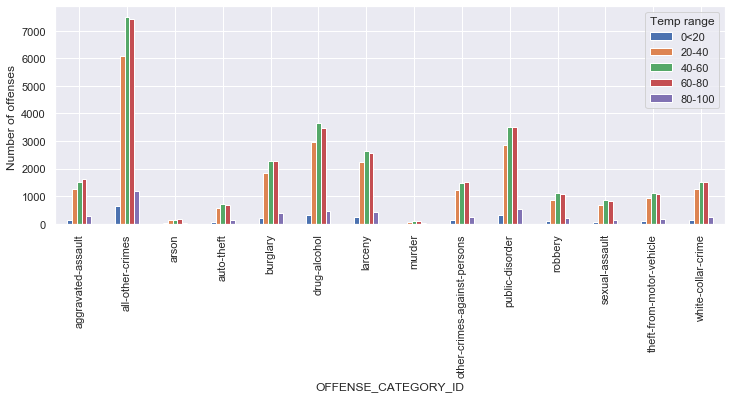

In [73]:
crime_weather_pivot=crime_weather_merge.pivot_table(index="Temp range", columns = 'OFFENSE_CATEGORY_ID', values ='INCIDENT_ID', aggfunc='count')
# crime_weather_pivot["Total offenses"] = crime_weather_pivot.iloc[:,:].sum(axis=1)
# crime_weather_pivot["Average offenses"] = crime_weather_pivot.iloc[:,:].mean(axis=1)

ax = crime_weather_pivot.T.plot(kind='bar')
ylab = ax.set_ylabel('Number of offenses ')
ax.plot(figsize=(20,10))

[]

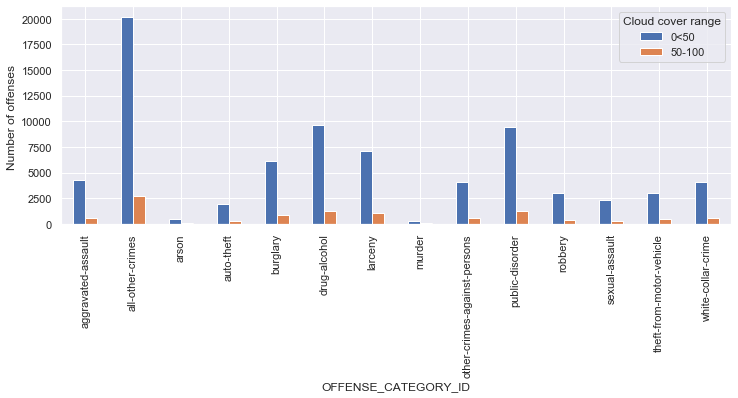

In [71]:
bins=[0,50,100]
label_group=["0<50","50-100"]
crime_weather_merge["Cloud cover range"]=pd.cut(crime_weather_merge["Cloud Cover"],bins,labels=label_group,include_lowest=True)
crime_cloud_pivot=crime_weather_merge.pivot_table(index="Cloud cover range", columns = 'OFFENSE_CATEGORY_ID', values ='INCIDENT_ID', aggfunc='count')

crime_weather_merge.head()
ax = crime_cloud_pivot.T.plot(kind='bar')
ylab = ax.set_ylabel('Number of offenses ')
ax.plot(figsize=(20,10))

[]

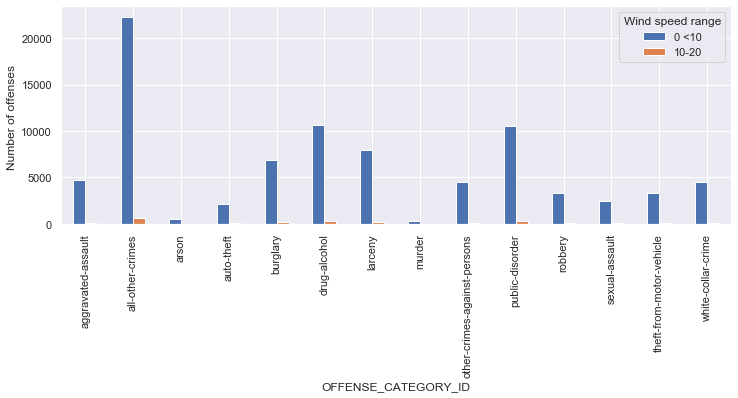

In [75]:
bins=[0,10,20]
label_group=["0 <10","10-20"]
crime_weather_merge["Wind speed range"]=pd.cut(crime_weather_merge["Wind Speed(Miles)"],bins,labels=label_group,include_lowest=True)
crime_wind_speed_pivot=crime_weather_merge.pivot_table(index="Wind speed range", columns = 'OFFENSE_CATEGORY_ID', values ='INCIDENT_ID', aggfunc='count')

ax = crime_wind_speed_pivot.T.plot(kind='bar')
ylab = ax.set_ylabel('Number of offenses ')
ax.plot(figsize=(20,10))
